In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("snack_pack_dataset.csv")

features = df[["Kalorie", "Białko (g)", "Tłuszcz (g)", "Węglowodany (g)", "Cena ($)"]].copy()

In [16]:
# Parametry: 1 - korzyść, 0 - koszt
benefit_criteria = [0, 1, 0, 0, 0]
weights = [1/5] * 5  # równe wagi

In [18]:
#Fuzzy TOPSIS
def fuzzy_topsis(data, benefit_criteria, weights):
    scaler = MinMaxScaler()
    normalized = scaler.fit_transform(data)

    for i in range(len(benefit_criteria)):
        if benefit_criteria[i] == 0:
            normalized[:, i] = 1 - normalized[:, i]

    weighted = normalized * weights
    ideal_best = np.max(weighted, axis=0)
    ideal_worst = np.min(weighted, axis=0)

    d_plus = np.linalg.norm(weighted - ideal_best, axis=1)
    d_minus = np.linalg.norm(weighted - ideal_worst, axis=1)

    return d_minus / (d_plus + d_minus)

In [19]:
# Fuzzy Hellwig
def fuzzy_hellwig(data, benefit_criteria, weights):
    scaler = MinMaxScaler()
    normalized = scaler.fit_transform(data)

    for i in range(len(benefit_criteria)):
        if benefit_criteria[i] == 0:
            normalized[:, i] = 1 - normalized[:, i]

    ideal_point = np.max(normalized, axis=0)
    distances = np.linalg.norm((normalized - ideal_point) * weights, axis=1)

    return 1 / (1 + distances)

In [20]:
df["TOPSIS"] = fuzzy_topsis(features, benefit_criteria, weights)
df["Hellwig"] = fuzzy_hellwig(features, benefit_criteria, weights)

df["Rank_TOPSIS"] = df["TOPSIS"].rank(ascending=False)
df["Rank_Hellwig"] = df["Hellwig"].rank(ascending=False)

print(df[["Nazwa", "TOPSIS", "Rank_TOPSIS", "Hellwig", "Rank_Hellwig"]])

               Nazwa    TOPSIS  Rank_TOPSIS   Hellwig  Rank_Hellwig
0              Banan  0.646995          5.0  0.833746           4.0
1             Chipsy  0.330152         10.0  0.760769           9.0
2             Jogurt  0.750134          1.0  0.893381           1.0
3            Orzechy  0.487247          8.0  0.764257           8.0
4          Czekolada  0.342180          9.0  0.752624          10.0
5             Jabłko  0.661588          4.0  0.832890           5.0
6            Kanapka  0.548667          6.0  0.819653           6.0
7  Batony proteinowy  0.667410          3.0  0.858556           3.0
8        Pizza slice  0.492520          7.0  0.795368           7.0
9              Kefir  0.692367          2.0  0.867150           2.0


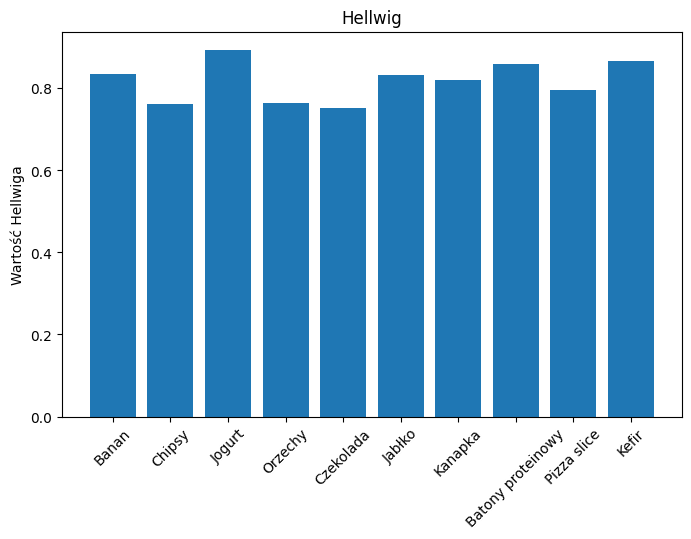

In [21]:
# Hellwig
plt.figure(figsize=(8, 5))
plt.bar(df["Nazwa"], df["Hellwig"])
plt.title("Hellwig")
plt.xticks(rotation=45)
plt.ylabel("Wartość Hellwiga")
plt.show()

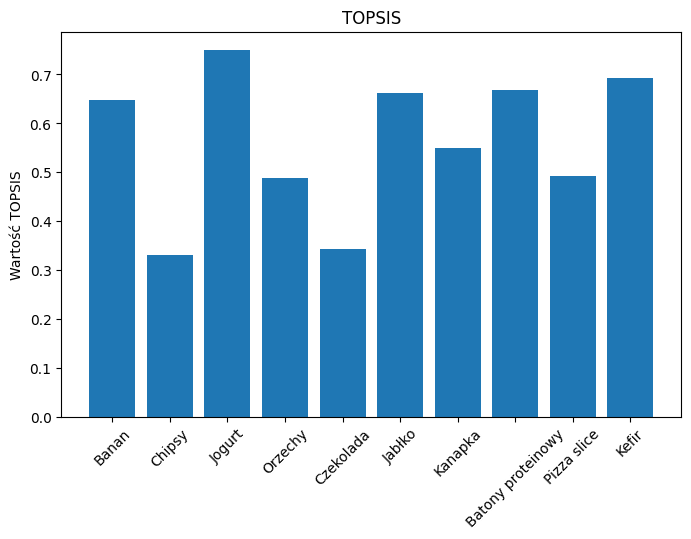

In [22]:
# TOPSIS
plt.figure(figsize=(8, 5))
plt.bar(df["Nazwa"], df["TOPSIS"])
plt.title("TOPSIS")
plt.xticks(rotation=45)
plt.ylabel("Wartość TOPSIS")
plt.show()